# SPLEX-Project 2020-2021 : Frog Calls 
-------
## 🐸 Step 2 : Predictory and classifications analysis of dataset 🐸
#### *Adrien Leroy and Antoine Auvergne*

In [40]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

#### Key variables

In [62]:
dataset=pd.read_csv('../anuran_calls/Frogs_MFCCs.csv')
features=dataset.columns[1:-4]
labels=dataset.columns[-4:]
family,genus,species,id=labels

### A. Random Forest 🌳🌳🌳

#### Testing classification with all labels __Independently__

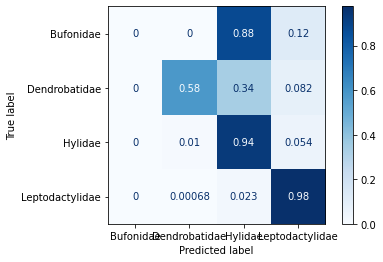

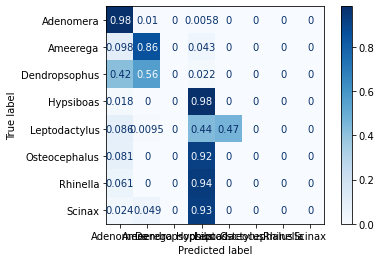

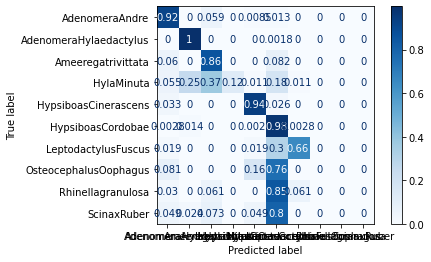

In [63]:
for label in labels[:-1]:
    x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, 
                                                        dataset[label], 
                                                        test_size=0.33, 
                                                        random_state=42)



    Rfclf = RandomForestClassifier(max_depth=3, random_state=0)
    Rfclf.fit(x_train, y_train)

    y_predicted=Rfclf.predict(x_test)
    confusion_matrix(y_test,y_predicted)
    plot_confusion_matrix(Rfclf,x_test,y_test,cmap=plt.cm.Blues,
                                     normalize='true')

    plt.savefig("../images/confusionMatrixGeneral_"+str(label)+".png")


#### Testing Hierachical approach 
COLONNA, J. G.; GAMA, J.; NAKAMURA, E. F. 
[**Recognizing Family, Genus, and Species of Anuran Using a Hierarchical Classification Approach**](https://www.researchgate.net/publication/305335644_Recognizing_Family_Genus_and_Species_of_Anuran_Using_a_Hierarchical_Classification_Approach).
Lecture Notes in Computer Science. 995ed.: Springer International Publishing, 2016, v. 9956, p. 198-212.

In [64]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, 
                                                    dataset[labels[0]], 
                                                    test_size=0.33, 
                                                    random_state=42)



Rfclf1 = RandomForestClassifier(max_depth=3, random_state=0)
Rfclf1.fit(x_train, y_train)
y_predicted=Rfclf.predict(x_test)
    
    
for label in np.unique(dataset[family]):
    print("Classifying "+str(label))
    RfclfTemp = RandomForestClassifier(max_depth=3, random_state=1)
    
    print(y_predicted.shape)
    
    """
    
    Rfclf2 = RandomForestClassifier(max_depth=3, random_state=0)
    Rfclf3 = RandomForestClassifier(max_depth=3, random_state=0)
    
    
    
    confusion_matrix(y_test,y_predicted)
    plot_confusion_matrix(Rfclf,x_test,y_test,cmap=plt.cm.Blues,
                                     normalize='true')

    plt.savefig("../images/confusionMatrixGeneral_"+str(label)+".png")
    
    """

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


Classifying Bufonidae
(2375,)
Classifying Dendrobatidae
(2375,)
Classifying Hylidae
(2375,)
Classifying Leptodactylidae
(2375,)
